In [1]:
import pandas as pd;import numpy as np

vinos=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\wine.data',header=None)
vinos.columns=['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium', 'Total phenols',
 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines',
 'Proline']
vinos=vinos[vinos['Class label']!=1]
y=vinos['Class label'].values
X=vinos[['Alcohol','OD280/OD315 of diluted wines']].values
vinos




,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
vinos['OD280/OD315 of diluted wines'].max()

3.69

### Sólo se escogen las dos características que anteriormente se ha demostrado que tienen mayor relevancia en la clasificación

In [3]:
from sklearn.preprocessing import LabelEncoder;from sklearn.model_selection import train_test_split
y=LabelEncoder().fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2,stratify=y)



Text(0.5, 0, 'Alcohol')

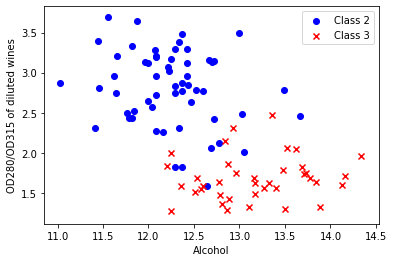

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='blue',label='Class 2')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='red',label='Class 3',marker='x')
plt.legend()
plt.ylabel('OD280/OD315 of diluted wines');plt.xlabel('Alcohol')

In [5]:
from sklearn.tree import DecisionTreeClassifier;from sklearn.ensemble import BaggingClassifier
arbol=DecisionTreeClassifier(random_state=1,max_depth=None,criterion='entropy')
bag=BaggingClassifier(base_estimator=arbol,n_estimators=500,random_state=1,n_jobs=-1)

#### Primero se estima la predición de un único estimador, en este caso, un Arbol de Decisión el cual clasifica de forma precisa el conjunto de entrenamiento, pero falla notablemente al momento de clasificar conjuntos de datos no vistos con anterioridad. Se puede entonces concluir que el estimador sufre de Overfittin(High-variance) 

In [6]:
from sklearn.metrics import accuracy_score
#arbol=arbol.fit(X_train,y_train)

y_train_pred=arbol.fit(X_train,y_train).predict(X_train)
y_test_pred=arbol.predict(X_test)
print(f'Precisión entrenamiento:{accuracy_score(y_train,y_train_pred)}\nPrecisión test:{accuracy_score(y_test,y_test_pred):.2f}')

Precisión entrenamiento:1.0
Precisión test:0.83


#### Cuando se implementa Bagging Classifier se puede observar que el rendimiento en general mejora, especialmente en la predición sobre conjuntos de datos no vistos con anterioridad por el modelo. 

In [7]:
y_train_pred_bag=bag.fit(X_train,y_train).predict(X_train)
y_test_pred_bag=bag.predict(X_test)
print(f'Precisión entrenamiento:{accuracy_score(y_train,y_train_pred_bag)}\nPrecisión test:{accuracy_score(y_test,y_test_pred_bag):.2f}')

Precisión entrenamiento:1.0
Precisión test:0.92


#### A continuación se gráfica las superficies de decisión de ambos estimadores. 

Text(0, 0.5, 'OD280/OD315 of diluted wines')

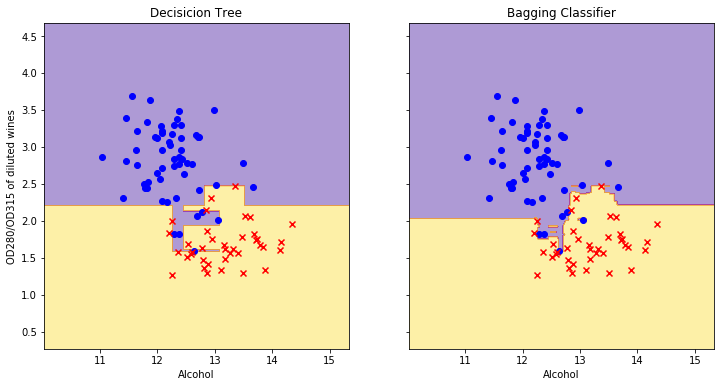

In [12]:
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;

x_min=np.min(X_train[:,0])-1
x_max=np.max(X_train[:,0])+1
y_min=np.min(X_train[:,1])-1
y_max=np.max(X_train[:,1])+1

vector1=np.arange(x_min,x_max,0.01);vector2=np.arange(y_min,y_max,0.01)
x_meshgrid,y_meshgrid=np.meshgrid(vector1,vector2)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6),sharey='row',sharex='col')

clasificadores=[arbol,bag];nombres=['Decisicion Tree','Bagging Classifier']

for index,clasificador,nombre in zip([0,1],clasificadores,nombres):
    Z=clasificador.predict(np.array([x_meshgrid.ravel(),y_meshgrid.ravel()]).T)
    Z=Z.reshape(x_meshgrid.shape)
    ax[index].contourf(x_meshgrid,y_meshgrid,Z,alpha=0.4,cmap='plasma')
    ax[index].set_title(nombre)
    ax[index].scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='blue',marker='o')
    ax[index].scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='red',marker='x')
    ax[index].set_xlabel('Alcohol')
    
ax[0].set_ylabel('OD280/OD315 of diluted wines')